In [1]:
import tempfile, subprocess, urllib.request, zipfile
import pandas as pd, numpy as np
import datetime
%matplotlib inline
from diagnose import diagnose

## load data and some formatting

In [2]:
with tempfile.TemporaryDirectory() as tmpdir:
    urllib.request.urlretrieve(
        'http://files.grouplens.org/datasets/movielens/ml-20m.zip',
        tmpdir + '/ml-20m.zip')
    zipfile.ZipFile(tmpdir + '/ml-20m.zip').extractall(tmpdir)
    print(subprocess.check_output(['ls', tmpdir+'/ml-20m']).decode('utf-8'))
    
    interactions = pd.read_csv(
        tmpdir + '/ml-20m/ratings.csv',
    ).rename({
        'userId':'USER_ID', 'movieId':'ITEM_ID', 'timestamp':'TIMESTAMP'
    }, axis=1)

    items = pd.read_csv(
        tmpdir + '/ml-20m/movies.csv',
        encoding='latin1',
    ).rename({
        'movieId':'ITEM_ID'
    }, axis=1)

genome-scores.csv
genome-tags.csv
links.csv
movies.csv
ratings.csv
README.txt
tags.csv



## show data template

In [3]:
interactions.head()

,USER_ID,ITEM_ID,rating,TIMESTAMP
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [4]:
items.head()

,ITEM_ID,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## run diagnostics

########################################
# DIAGNOSING INTERACTIONS TABLE, SAMPLE:
########################################
          USER_ID  ITEM_ID  rating   TIMESTAMP
6725782     46313     3702     3.5  1166918490
12170483    84067      905     4.0   939671510
9165432     63317     4148     3.5  1265085546
11001378    76079     1188     4.0  1121667906
5607846     38603      708     4.0   895426887
4773274     32772      318     5.0  1012450111
12867997    88852     1923     4.0  1093993294
6438489     44226      153     2.5  1100629680
14041310    96986      515     4.0   978674527
12787996    88383     6502     3.5  1281395423

=== Interactions table, original shape=(20000263, 4) ===

missing rate in fields ['USER_ID', 'ITEM_ID', 'TIMESTAMP'] 0.0
dropna shape (20000263, 4)
duplication rate 0.0
drop_duplicates shape (20000263, 4)
user item repeat rate 0.0

=== Describe interactions table ===

             rating     TIMESTAMP
count  2.000026e+07  2.000026e+07
mean   3.525529e+00  1

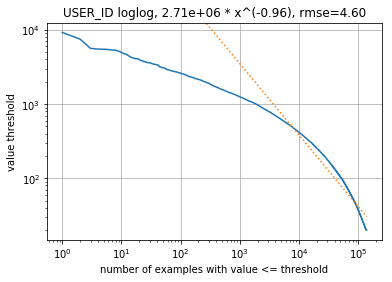


=== ITEM_ID top 10 categories ===
296     67310
356     66172
318     63366
593     63299
480     59715
260     54502
110     53769
589     52244
2571    51334
527     50054
dtype: int64


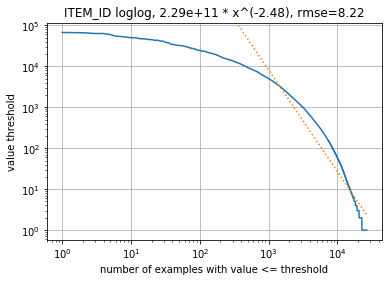


=== Hourly activity pattern ===
0      946689
1      891222
2      893318
3      880206
4      761767
5      693646
6      640515
7      582846
8      552690
9      519421
10     524195
11     546619
12     613826
13     691889
14     786165
15     879910
16     958747
17    1007302
18    1087910
19    1144854
20    1157567
21    1163521
22    1083166
23     992272
dtype: int64

=== Day of week activity pattern ===
0    3114661
1    3084949
2    2865378
3    2696561
4    2710068
5    2626447
6    2902199
dtype: int64


/home/yifeim/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


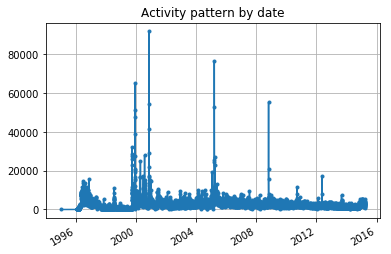

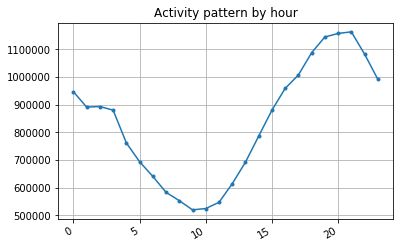

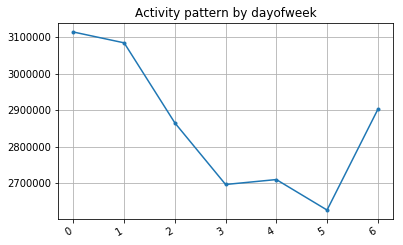


=== Temporal shift analysis ===

temporal out-sample items, freq=1d, hist_len=1, avg_loss=31.1%, time=31.3s
temporal out-sample items, freq=1d, hist_len=10, avg_loss=5.3%, time=33.7s
temporal out-sample items, freq=1d, hist_len=100, avg_loss=0.8%, time=38.0s
temporal out-sample items, freq=1d, hist_len=1000, avg_loss=0.3%, time=47.1s


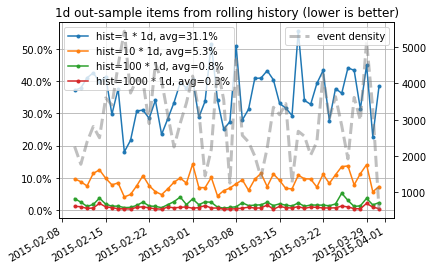

temporal cross-entropy, freq=1d, hist_len=1, avg_loss=9.31, time=31.8s
temporal cross-entropy, freq=1d, hist_len=10, avg_loss=7.78, time=33.6s
temporal cross-entropy, freq=1d, hist_len=100, avg_loss=7.63, time=38.4s
temporal cross-entropy, freq=1d, hist_len=1000, avg_loss=7.83, time=47.2s


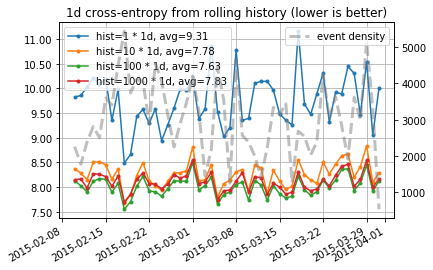

temporal out-sample items, freq=3h, hist_len=1, avg_loss=70.9%, time=37.2s
temporal out-sample items, freq=3h, hist_len=10, avg_loss=26.4%, time=44.5s
temporal out-sample items, freq=3h, hist_len=100, avg_loss=4.4%, time=71.5s
temporal out-sample items, freq=3h, hist_len=1000, avg_loss=0.6%, time=133.2s


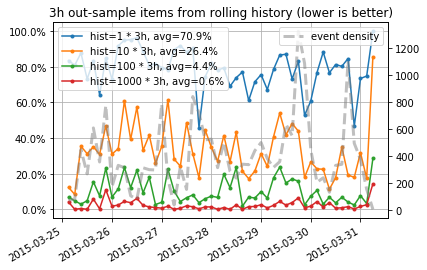

temporal cross-entropy, freq=3h, hist_len=1, avg_loss=12.19, time=37.7s
temporal cross-entropy, freq=3h, hist_len=10, avg_loss=9.00, time=45.0s
temporal cross-entropy, freq=3h, hist_len=100, avg_loss=7.74, time=72.4s
temporal cross-entropy, freq=3h, hist_len=1000, avg_loss=7.64, time=134.8s


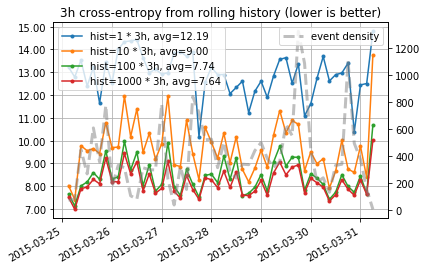


=== session time delta describe ===
count    1.986177e+07
mean     1.184378e+05
std      2.127205e+06
min      0.000000e+00
25%      3.000000e+00
50%      1.100000e+01
75%      3.600000e+01
max      4.645970e+08
Name: TIMESTAMP, dtype: float64


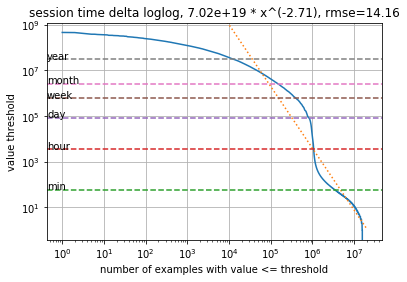

/home/yifeim/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


=== user time span describe ===
count    1.384930e+05
mean     1.698559e+07
std      5.423238e+07
min      0.000000e+00
25%      8.980000e+02
50%      3.398000e+03
75%      2.641789e+06
max      5.534154e+08
Name: TIMESTAMP, dtype: float64


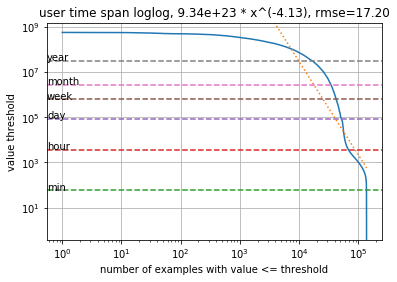

########################################
# USERS TABLE NOT FOUND
########################################
########################################
# DIAGNOSING ITEMS TABLE, SAMPLE:
########################################
       ITEM_ID                                              title  \
22668   108546             Private Lessons (ÃlÃ¨ve libre) (2008)   
21754   105215              Scatter My Ashes at Bergdorf's (2013)   
7727      8261                       3 Women (Three Women) (1977)   
21994   106064                                        Race (2008)   
20087    98981                     Arrival of a Train, The (1896)   
14346    71865                                Rich in Love (1993)   
16577    83791  Gung Ho! (Gung Ho!: The Story of Carlson's Mak...   
5747      5846                                 Raggedy Man (1981)   
19592    96973                           Painted Veil, The (1934)   
4295      4390                         Rape Me (Baise-moi) (2000)   

                  

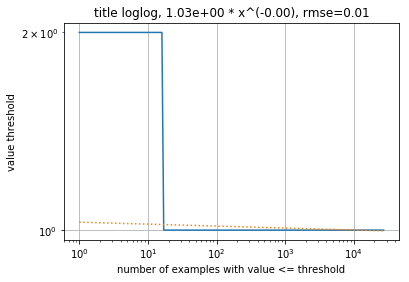


=== genres top 10 categories ===
Drama          13344
Comedy          8374
Thriller        4178
Romance         4127
Action          3520
Crime           2939
Horror          2611
Documentary     2471
Adventure       2329
Sci-Fi          1743
dtype: int64
CREATION_TIMESTAMP not found in items table


/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:73: UserWarning: 
            Heavy-tail title distributions are usually hard to learn (slope=-0.0029748976193251604)!
            Consider rolling up title or dropping its rare values.
            
  """.format(name, slope))


In [5]:
diagnose(interactions, None, items)